In [1]:
#!/usr/bin/env python
from sqlalchemy import MetaData
from sqlalchemy import create_engine
from sqlalchemy import Integer, String
from sqlalchemy import Table, Column
from sqlalchemy import sql, select, join, desc
import pandas as pd
import matplotlib.pyplot as pt


In [16]:
#Creating an engine object which would be the handle into the database.
engine = create_engine('sqlite:///world.sqlite')

#Connecting to the database
conn = engine.connect()

#Read the metadata from the existing database.
#Since the database already exists and has tables defined, we can create Python objects based on these automatically.
DataBaseInfo=MetaData(engine)


In [31]:
#Auto-create the country object based on the metadata read into the DBInfo.
country=Table('country', DataBaseInfo, autoload=True)

#Mirroring this command: SELECT GNP, LifeExpectancy FROM country;
query=select([country.c.GNP, country.c.LifeExpectancy])


In [32]:
#Reading the SQL query results into a Pandas data frame
df=pd.read_sql(query, conn)
#df.tail()


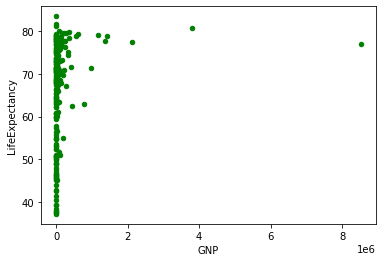

In [36]:
#Graph Plot
df.plot.scatter(x='GNP', y='LifeExpectancy', c='green')
pt.savefig('Problem_Set-5.jpeg', dpi=600)
pt.show()

